In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df_index = pd.read_csv('economic_index.csv')

In [7]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
# drop unecessary columns
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [10]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [13]:
## check null values

df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

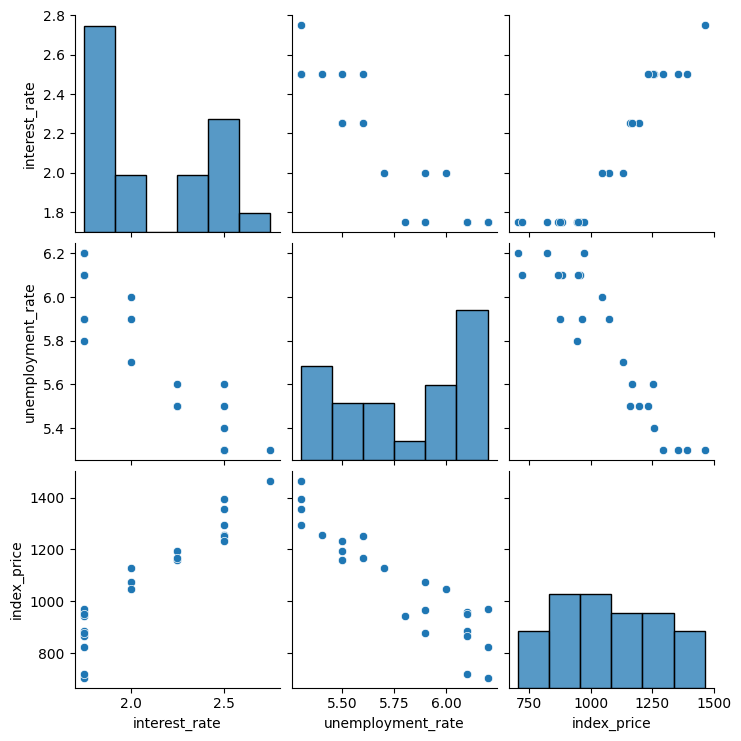

In [14]:
## Lets do some visualization

import seaborn as sns

sns.pairplot(df_index)

In [15]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployement Rate')

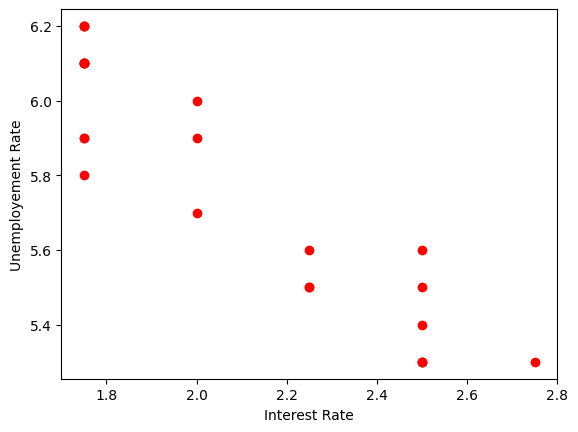

In [18]:
## Visualize the data points more closely

plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployement Rate")

In [19]:
# Independent and dependent features

X = df_index.iloc[:,:-1]
y = df_index.iloc[:, -1]

In [21]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [22]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [26]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

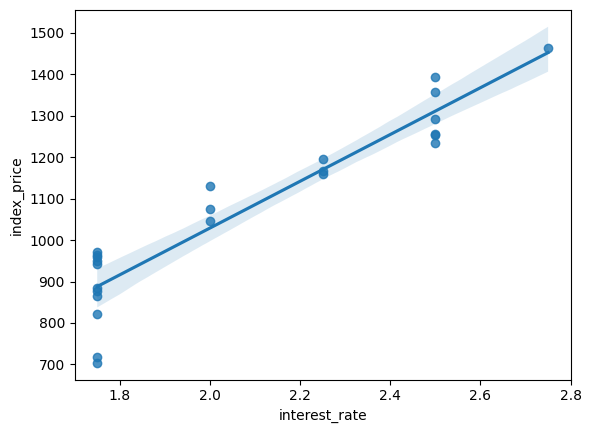

In [28]:
sns.regplot(x = df_index['interest_rate'], y =df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

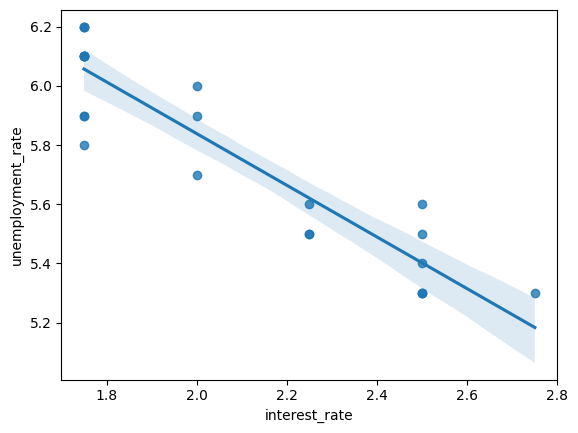

In [30]:
sns.regplot(x = df_index['interest_rate'], y =df_index['unemployment_rate'])

In [31]:
# Standardization

from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regression = LinearRegression()

In [37]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score

In [39]:
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [ ]:
np.mean(validation_score)


np.float64(-5649.115244350759)

In [42]:
y_pred = regression.predict(X_test)

In [43]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [44]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, mae, rmse

(8108.567426306607, 73.80444932337097, np.float64(90.04758423359623))

In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
print(1- (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


### Assumptions

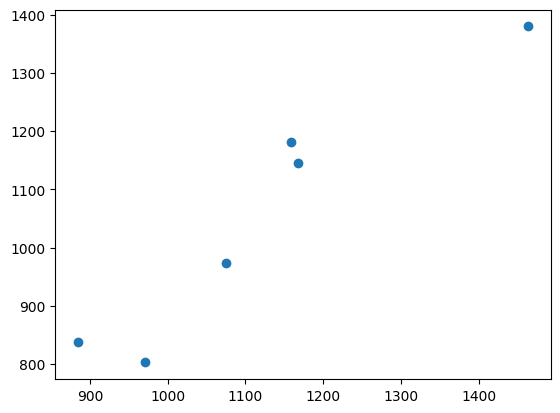

In [48]:
plt.scatter(y_test, y_pred)

In [49]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


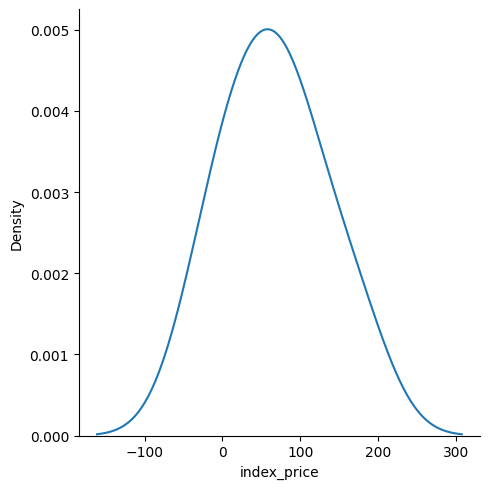

In [51]:
sns.displot(residuals, kind='kde')

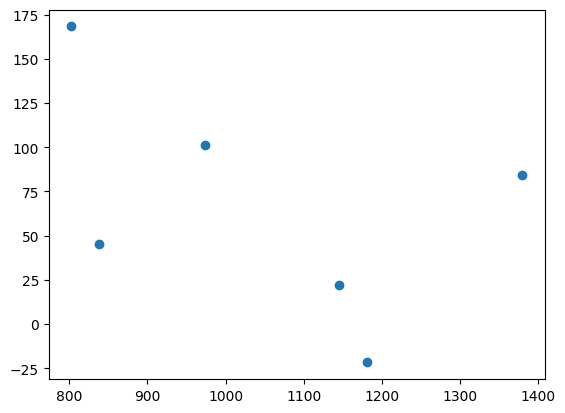

In [52]:
## scatter plot wrt predictions and residuals

plt.scatter(y_pred, residuals)

In [53]:
import statsmodels.api as sm

In [54]:
model = sm.OLS(y_train, X_train).fit()

In [55]:
model.summary()

/Users/deepayanbose/Documents/AIML_COHORT/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 17 Sep 2025   Prob (F-statistic):                       0.754
Time:                        15:34:39   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
regression.coef_

array([  88.27275507, -116.25716066])